# **훈련 세트와 테스트 세트**  
## 지도 학습과 비지도 학습

In [1]:
# 도미와 빙어 데이터를 합쳐 하나의 데이터 구성, 테스트 세트로 사용
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 위 데이터를 2차원 리스트로 구성
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

In [2]:
# 모델 객체 생성
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [3]:
train_input = fish_data[:35] # 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35] # 훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
test_input = fish_data[35:] # 테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_target = fish_target[35:] # 테스트 세트로 타깃값 중 35번째부터 마지막 인덱스까지 사용

kn.fit(train_input, train_target) # 모델 훈련
kn.score(test_input, test_target) # 모델 평가

0.0

위 코드에서 모델의 정확도가 0.0이 되는 이유 : **샘플링 편향**  
마지막 14개를 테스트 세트로 하면 훈련 세트에는 빙어 데이터가 없다.  
빙어 없이 모델을 훈련하면 빙어를 올바르게 분류할 수 없다.

In [4]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
print(input_arr)
print(input_arr.shape) # (샘플 수, 특성 수)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
(49, 2)


데이터 섞는 방법
1. arange() 함수를 사용해 0~48까지 1씩 증가하는 인덱스 생성
2. 생성한 인덱스를 랜덤하게 섞기
3. shuffle() 함수 이용해 배열 무작위로 섞기  
  
넘파이에서 무작위 결과를 만드는 함수들은 실행할 때마다 다른 결과를 만들기 때문에 일정한 결과를 위해서 초기에 랜덤 시드를 지정.

In [5]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)
print(index)
print(input_arr[[1, 3]]) # 배열 인덱싱


[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]
[[ 26.3 290. ]
 [ 29.  363. ]]


In [6]:
# index 배열의 처음 35개를 input_arr, target_arr에 전달해 랜덤한 35개의 샘플을 훈련 세트로 생성
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [7]:
# 나머지 14개로 테스트 세트 생성
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

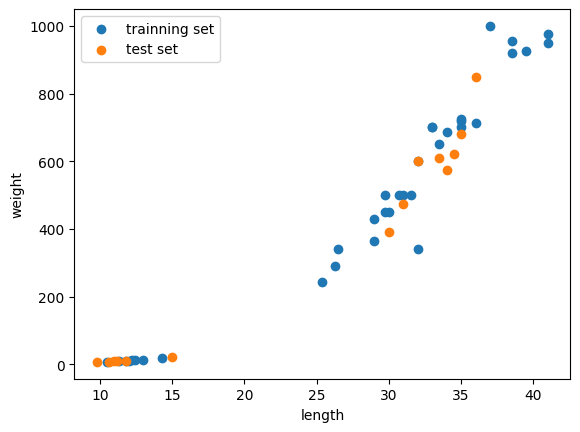

In [8]:
# 두 데이터의 산점도 그래프
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1], label='trainning set')
plt.scatter(test_input[:, 0], test_input[:, 1], label='test set')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

## 두 번째 머신러닝 프로그램
fit() 메소드를 실행할 때마다 KNeighborsClassfier 클래스의 객체는 이전에 학습한 모든 것을 잃는다.  
모델을 그대로 두고 싶다면 KNeighborsClassfier 클래스 객체를 새로 생성해야 한다.  
이 코드에서는 그대로 사용한다.

In [11]:
kn.fit(train_input, train_target) # 모델 훈련
kn.score(test_input, test_target) # 모델 테스트

1.0

In [12]:
kn.predict(test_input) # 훈련된 모델로 예측

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [13]:
test_target # 예측한 결과와 동일함

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])